In [154]:

import datetime
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


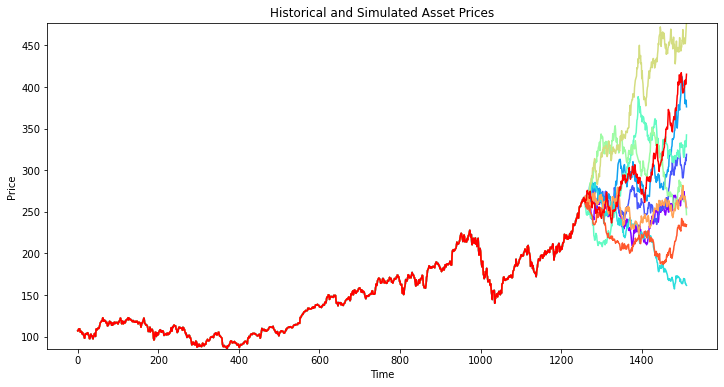

In [155]:
np.random.seed(4518)  # Set seed for reproducibility

def Visualize(S):
    """
    Visualize multiple time series data.
    Each row of S represents a different series.
    """
    minS = np.min(S)
    maxS = np.max(S)
    noS = S.shape[0]  # Number of series
    cl = plt.cm.rainbow(np.linspace(0, 1, noS))  # Color map

    plt.figure(figsize=(12, 6))
    for i in range(noS):
        plt.plot(S[i, :], color=cl[i], label=f'Series {i+1}')
    plt.ylim([minS, maxS])
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Historical and Simulated Asset Prices')
    #plt.legend()
    plt.show()

# Read data
AAA = pd.read_csv('AAA.csv', header=0)
dt = 1/252
AAAprices = AAA.iloc[:, 1:4].values.astype(float)  # Extract columns 2, 3, 4

n0 = AAAprices.shape[0]
AAAlogprices = np.log(AAAprices)
AAAlogreturns = AAAlogprices[1:n0, :] - AAAlogprices[0:n0-1, :]

# Estimate drift (v) and covariance matrix (Sigma)
v = np.mean(AAAlogreturns, axis=0) / dt
Sigma = np.cov(AAAlogreturns.T) / dt

def SimMultiGBMexact(S0, v, Sigma, Deltat, T):
    """
    Simulate paths of a multivariate Geometric Brownian Motion (GBM).

    Parameters:
    - S0: Initial asset prices (array)
    - v: Drift vector (array)
    - Sigma: Covariance matrix (2D array)
    - Deltat: Time increment
    - T: Total time

    Returns:
    - S: Simulated asset prices (2D array)
    """
    m = int(T / Deltat)  # Number of periods
    p = len(S0)          # Number of assets
    S = np.zeros((p, m + 1))
    S[:, 0] = S0
    Z = np.random.multivariate_normal(v * Deltat, Sigma * Deltat, m)
    

    for j in range(1, m + 1):
        S[:, j] = S[:, j - 1] * np.exp(Z[j - 1, :])
    return S

# Simulation parameters
Nsim = 10
T = 1
dt = 1/252
m = int(T / dt)
S0 = AAAprices[-1, :]  # Last observed prices

# Initialize matrices to store simulated paths
S1 = np.zeros((Nsim, m + 1))
S2 = np.zeros((Nsim, m + 1))
S3 = np.zeros((Nsim, m + 1))

#np.random.seed(4518)  # Set seed for reproducibility

# Simulate paths
for i in range(Nsim):
    S = SimMultiGBMexact(S0, v, Sigma, dt, T)
    S1[i, :] = S[0, :]
    S2[i, :] = S[1, :]
    S3[i, :] = S[2, :]

# Combine historical and simulated data for the first asset
HistS1 = np.tile(AAAprices[:, 0], (Nsim, 1))
wholeS1 = np.hstack((HistS1, S1))

# Visualize the paths
Visualize(wholeS1)


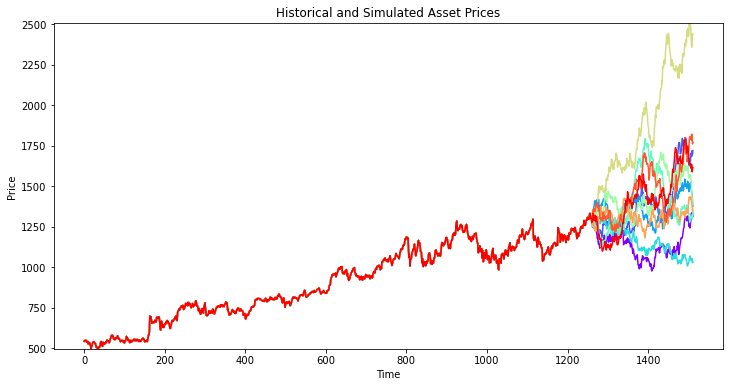

In [156]:
HistS2 = np.tile(AAAprices[:, 1], (Nsim, 1))
wholeS2 = np.hstack((HistS2, S2))
Visualize(wholeS2)

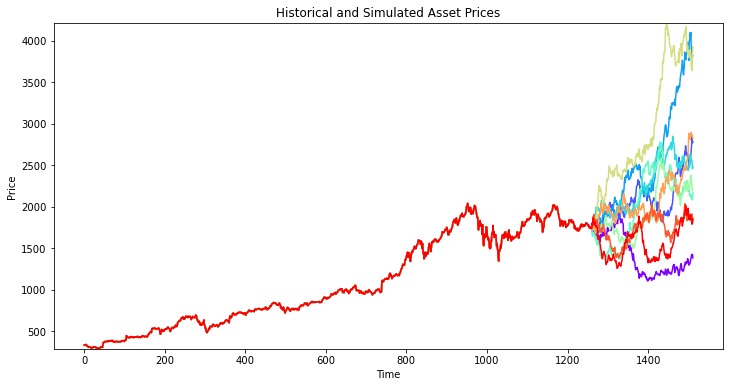

In [157]:
HistS3 = np.tile(AAAprices[:, 2], (Nsim, 1))
wholeS3 = np.hstack((HistS3, S3))
Visualize(wholeS3)

In [158]:
v

array([0.18054363, 0.17488585, 0.33334629])

In [159]:

start_date = datetime.datetime.strptime('2022-09-30', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2024-6-29', '%Y-%m-%d')  #1 aug to 31 October
# Specify the ticker for BMW (BMW.DE for Frankfurt Stock Exchange)
BMW_ticker = 'BMW.DE'
MBG_ticker = 'MBG.DE'
P_ticket = 'P911.DE'

# Download historical data for BMW
bmw_data = yf.download(BMW_ticker, start=start_date, end=end_date)
mbg_data = yf.download(MBG_ticker, start=start_date, end=end_date)
p_data = yf.download(P_ticket, start=start_date, end=end_date)
# Display the data
#print(bmw_data.head(2))
#print(mbg_data.head(2))
print(p_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                       P911.DE    P911.DE    P911.DE    P911.DE   
Date                                                                    
2022-09-30 00:00:00+00:00  79.233162  82.500000  83.500000  82.500000   
2022-10-03 00:00:00+00:00  78.560883  81.800003  82.720001  81.000000   
2022-10-04 00:00:00+00:00  84.015961  87.480003  87.480003  82.000000   
2022-10-05 00:00:00+00:00  84.438538  87.919998  89.639999  86.519997   
2022-10-06 00:00:00+00:00  87.127663  90.720001  93.699997  89.339996   

Price                           Open   Volume  
Ticker                       P911.DE  P911.DE  
Date                                           
2022-09-30 00:00:00+00:00  82.900002  5079137  
2022-10-03 00:00:00+00:00  82.500000  2403446  
2022-10-04 00:00:00+00:00  82.699997  1599630  
2022-10-05 00:00:00+00:00  87.099998  1321304  
2022-10-06 00:00:00+00:00  89.699997  2217065  


In [160]:
len(p_data)

446

In [161]:
# Check for missing values
print(mbg_data.isnull().sum())
print(bmw_data.isnull().sum())
print(p_data.isnull().sum())

Price      Ticker
Adj Close  MBG.DE    0
Close      MBG.DE    0
High       MBG.DE    0
Low        MBG.DE    0
Open       MBG.DE    0
Volume     MBG.DE    0
dtype: int64
Price      Ticker
Adj Close  BMW.DE    0
Close      BMW.DE    0
High       BMW.DE    0
Low        BMW.DE    0
Open       BMW.DE    0
Volume     BMW.DE    0
dtype: int64
Price      Ticker 
Adj Close  P911.DE    0
Close      P911.DE    0
High       P911.DE    0
Low        P911.DE    0
Open       P911.DE    0
Volume     P911.DE    0
dtype: int64


In [162]:
bmw_data.columns

MultiIndex([('Adj Close', 'BMW.DE'),
            (    'Close', 'BMW.DE'),
            (     'High', 'BMW.DE'),
            (      'Low', 'BMW.DE'),
            (     'Open', 'BMW.DE'),
            (   'Volume', 'BMW.DE')],
           names=['Price', 'Ticker'])

In [163]:
BMP = pd.concat([bmw_data['Close'], mbg_data['Close'], p_data['Close']], axis=1)

In [164]:
bmp_prices = pd.concat([bmw_data['Close', 'BMW.DE'], mbg_data['Close', 'MBG.DE'], p_data['Close', 'P911.DE']], axis=1)
bmp_prices.columns = ['BMW', 'MBG', 'Porsche']
bmp_prices

,BMW,MBG,Porsche
Date,,,
2022-09-30 00:00:00+00:00,69.989998,52.349998,82.500000
2022-10-03 00:00:00+00:00,70.730003,52.990002,81.800003
2022-10-04 00:00:00+00:00,72.849998,55.000000,87.480003
2022-10-05 00:00:00+00:00,71.470001,53.009998,87.919998
2022-10-06 00:00:00+00:00,71.970001,53.840000,90.720001
...,...,...,...
2024-06-24 00:00:00+00:00,89.639999,64.540001,70.360001
2024-06-25 00:00:00+00:00,90.239998,64.809998,71.120003
2024-06-26 00:00:00+00:00,87.959999,64.250000,71.120003


In [165]:
# Read data
#AAA = pd.read_csv('AAA.csv', header=0)
dt = 1/252
bmp_prices = BMP.values.astype(float)  # Extract columns 

n0 = bmp_prices.shape[0]
bmplogprices = np.log(bmp_prices)
bmplogreturns = bmplogprices[1:n0, :] - bmplogprices[0:n0-1, :]
bmplogreturns

array([[ 0.01051751,  0.01215134, -0.00852101],
       [ 0.02953265,  0.03722994,  0.06713295],
       [-0.01912471, -0.03685264,  0.00501706],
       ...,
       [-0.02559061, -0.00867815,  0.        ],
       [ 0.00159036, -0.01284478,  0.        ],
       [ 0.00317315,  0.01781296, -0.0227542 ]])

In [166]:
d0 = datetime.date(2024, 6, 28)
d1 = datetime.date(2024, 10, 28)
m = (d1 - d0).days
m = 86 #87 biz days

In [167]:
-(datetime.date(2022, 9, 30)- datetime.date(2024, 10, 28)).days

759

In [168]:
v

array([0.18054363, 0.17488585, 0.33334629])

In [169]:
def Visualize(S, S_real, barrier_levels, early_redemption_level):
    """
    Visualize multiple time series data.
    Each row of S represents a different series.
    """
    minS = np.min(S)
    maxS = np.max(S)
    noS = S.shape[0]  # Number of series
    cl = plt.cm.rainbow(np.linspace(0, 1, noS))  # Color map

    plt.figure(figsize=(12, 6))
    for i in range(noS):
        plt.plot(S[i, :], color=cl[i], label=f'Series {i+1}')
        
    plt.ylim([minS, maxS])
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Historical and Simulated Asset Prices')
    plt.plot(S_real.values, color='black', label='Real')
    #plot lines for barrier levels and early redemption level
    plt.axhline(y=barrier_levels, color='r', linestyle='--', label='Barrier Level 1')
    plt.axhline(y=early_redemption_level, color='g', linestyle='--', label='Early Redemption Level')

    #plt.legend()
    plt.show()

In [170]:
def black_scholes_multi(S0, v, Sigma, Delta_t, T):

    m = int(T / Delta_t)  # no.of periods
    p = len(S0)
    S = np.zeros((p, m+1))
    S[:, 0] = S0

    Z = multivariate_normal.rvs(mean=v * Delta_t, cov=Sigma * Delta_t, size=m)

    for t in range(1, m+1):
        S[:, t] = np.exp(np.log(S[:, t-1]) + Z[t-1])

    return S

[*********************100%***********************]  1 of 1 completed

(1000, 87)


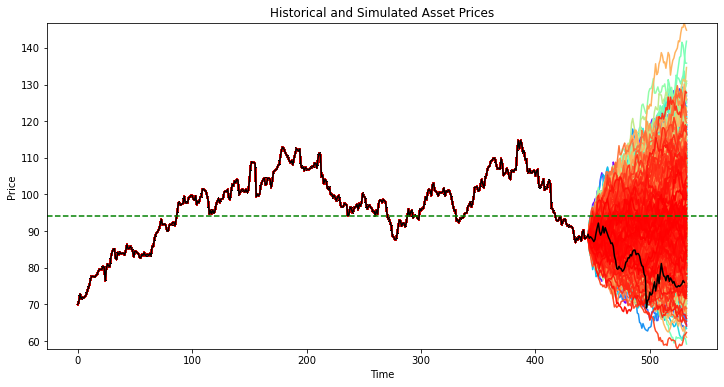

In [171]:
barrier_levels = [56.520, 39.516, 58.896]
early_redemption_level = [94.2, 65.86, 98.16]

#bmplogreturns = returns.to_numpy()
# set the numpy seed
np.random.seed(4518)
# Estimate drift (v) and covariance matrix (Sigma)
v = np.mean(bmplogreturns, axis=0) / dt
Sigma = np.cov(bmplogreturns.T) / dt

def SimMultiGBMexact(S0, v, Sigma, Deltat):
    """
    Simulate paths of a multivariate Geometric Brownian Motion (GBM).

    Parameters:
    - S0: Initial asset prices (array)
    - v: Drift vector (array)
    - Sigma: Covariance matrix (2D array)
    - Deltat: Time increment
    - T: Total time

    Returns:
    - S: Simulated asset prices (2D array)
    """
    p = len(S0)          # Number of assets
    S = np.zeros((p, m + 1))
    S[:, 0] = S0
    Z = np.random.multivariate_normal(v * Deltat, Sigma * Deltat, m)

    for j in range(1, m + 1):
        S[:, j] = np.exp(np.log(S[:, j - 1])+Z[j - 1, :])
    return S

def SimMultiGBMexactAV(S0, v, Sigma, Deltat):
    """
    Simulate paths of a multivariate Geometric Brownian Motion (GBM).

    Parameters:
    - S0: Initial asset prices (array)
    - v: Drift vector (array)
    - Sigma: Covariance matrix (2D array)
    - Deltat: Time increment
    - T: Total time

    Returns:
    - S: Simulated asset prices (2D array)
    """
    p = len(S0)          # Number of assets
    S = np.zeros((p, m + 1))
    Stilde = np.zeros((p, m + 1))
    S[:, 0] = S0
    Stilde[:, 0] = S0
    Z = np.random.multivariate_normal(v * Deltat, Sigma * Deltat, m)

    for j in range(1, m + 1):
        S[:, j] = S[:, j - 1] * np.exp(Z[j - 1, :])
        Stilde[:, j] = Stilde[:, j - 1] * np.exp(-Z[j - 1, :])
    

    return S, Stilde



# Simulation parameters
Nsim = 1000
#T = 1.25
dt = 1/252
S0 = bmp_prices[-1, :]  # Last observed prices

# Initialize matrices to store simulated paths
S1 = np.zeros((Nsim, m + 1))
S2 = np.zeros((Nsim, m + 1))
S3 = np.zeros((Nsim, m + 1))

#np.random.seed(4518)  # Set seed for reproducibility
AV=False
if not AV:
# Simulate paths
    for i in range(Nsim):
        S = SimMultiGBMexact(S0, v, Sigma, dt)
        S1[i, :] = S[0, :]
        S2[i, :] = S[1, :]
        S3[i, :] = S[2, :]

else:

    S1 = np.zeros((Nsim*2, m + 1))
    S2 = np.zeros((Nsim*2, m + 1))
    S3 = np.zeros((Nsim*2, m + 1))

    for i in range(0,Nsim*2,2):
        S, Stilde = SimMultiGBMexactAV(S0, v, Sigma, dt)
        S1[i, :] = S[0, :]
        S1[i+1, :] = Stilde[0, :]
        S2[i, :] = S[1, :]
        S2[i+1, :] = Stilde[1, :]
        S3[i, :] = S[2, :]
        S3[i+1, :] = Stilde[2, :]
    
print(S3.shape)
# Combine historical and simulated data for the first asset
k=2 if AV else 1
HistS1 = np.tile(bmp_prices[:, 0], (Nsim*k, 1))
wholeS1 = np.hstack((HistS1, S1))

#Plot real data of BMW from 2022-09-30 to 2024-10-28
start_date_real= datetime.datetime.strptime('2022-09-30', '%Y-%m-%d')
end_date_real = datetime.datetime.strptime('2024-10-28', '%Y-%m-%d')  #1 aug to 31 October
# Specify the ticker for BMW (BMW.DE for Frankfurt Stock Exchange)
BMW_ticker = 'BMW.DE'

# Download historical data for BMW
bmw_data_real = yf.download(BMW_ticker, start=start_date_real, end=end_date_real)
# Visualize the paths
Visualize(wholeS1, bmw_data_real['Close'], barrier_levels[0], early_redemption_level[0])


In [172]:
S0

array([88.37999725, 64.56999969, 69.51999664])

[*********************100%***********************]  1 of 1 completed


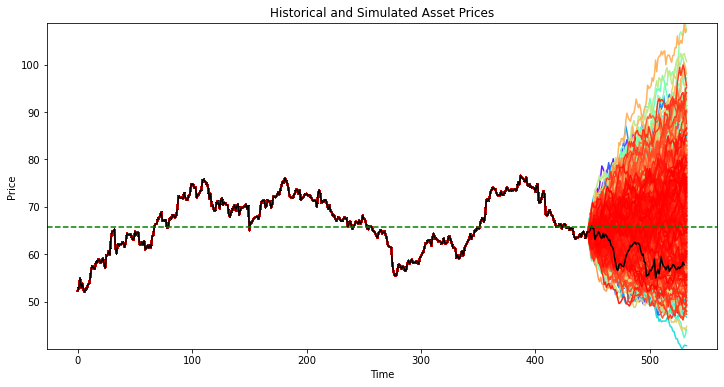

In [173]:
# Combine historical and simulated data for the first asset
HistS2 = np.tile(bmp_prices[:, 1], (Nsim*k, 1))
wholeS2 = np.hstack((HistS2, S2))

# Specify the ticker for BMW (BMW.DE for Frankfurt Stock Exchange)
MBG_ticker = 'MBG.DE'

# Download historical data for BMW
mbg_data_real = yf.download(MBG_ticker, start=start_date_real, end=end_date_real)


# Visualize the paths
Visualize(wholeS2, mbg_data_real['Close'], barrier_levels[1], early_redemption_level[1])

[*********************100%***********************]  1 of 1 completed


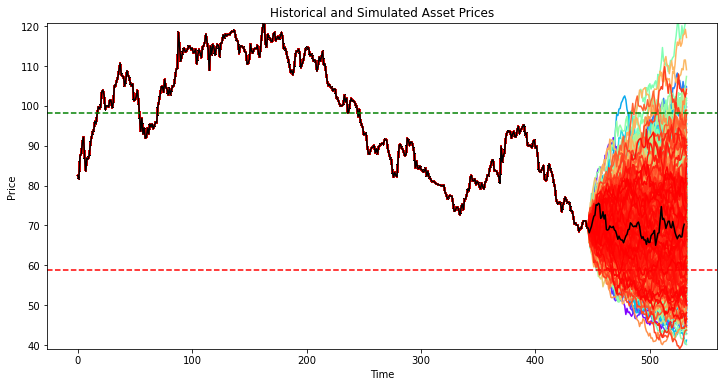

In [174]:
# Combine historical and simulated data for the first asset
HistS3 = np.tile(bmp_prices[:, 2], (Nsim*k, 1))
wholeS3 = np.hstack((HistS3, S3))

#get real data for Porsche
P_ticket = 'P911.DE'
p_data_real = yf.download(P_ticket, start=start_date_real, end=end_date_real)

# Visualize the paths
Visualize(wholeS3, p_data_real['Close'], barrier_levels[2], early_redemption_level[2])

In [175]:
print('length of history:', len(list(BMP.index.values)))
print('length of simulated:',len(S1[0]))  #first value is S0, which is final day of history

length of history: 446
length of simulated: 87


In [176]:
#stack S1, S2, S3 as a 3d array
all_S = np.stack((S1, S2, S3), axis=0)
all_S = np.transpose(all_S,(1,0,2))
all_S.shape

(1000, 3, 87)

In [177]:
#Count number of times porsche hits barrier level
count = 0
for i in range(len(all_S)):
    if np.any(all_S[i][2] <= barrier_levels[2]):
        count += 1
count

357

In [178]:
S0

array([88.37999725, 64.56999969, 69.51999664])

In [179]:
all_S[:,2,0] #index 0 is BMW, 1 is Mercedes, 2 is Porsche

array([69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51999664,
       69.51999664, 69.51999664, 69.51999664, 69.51999664, 69.51

In [180]:
start_date = datetime.datetime.strptime('2024-06-28', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2024-06-29', '%Y-%m-%d')
# Specify the ticker for BMW (BMW.DE for Frankfurt Stock Exchange)
BMW_ticker = 'BMW.DE'
MBG_ticker = 'MBG.DE'
P_ticket = 'P911.DE'

# Download historical data for BMW
bmw_data_check = yf.download(BMW_ticker, start=start_date, end=end_date)
mbg_data_check  = yf.download(MBG_ticker, start=start_date, end=end_date)
p_data_check  = yf.download(P_ticket, start=start_date, end=end_date)
# Display the data
print(bmw_data_check.head())
print(mbg_data_check.head())
print(p_data_check.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High    Low       Open  \
Ticker                        BMW.DE     BMW.DE     BMW.DE BMW.DE     BMW.DE   
Date                                                                           
2024-06-28 00:00:00+00:00  88.379997  88.379997  89.059998   88.0  89.040001   

Price                       Volume  
Ticker                      BMW.DE  
Date                                
2024-06-28 00:00:00+00:00  1049108  
Price                     Adj Close  Close       High        Low       Open  \
Ticker                       MBG.DE MBG.DE     MBG.DE     MBG.DE     MBG.DE   
Date                                                                          
2024-06-28 00:00:00+00:00     64.57  64.57  65.209999  64.099998  64.690002   

Price                       Volume  
Ticker                      MBG.DE  
Date                                
2024-06-28 00:00:00+00:00  4116238  
Price                      Adj Close      Close       High        

In [181]:
early_redemption_dates = [datetime.datetime.strptime('2024-03-5', '%Y-%m-%d'), datetime.datetime.strptime('2024-06-5', '%Y-%m-%d'), datetime.datetime.strptime('2024-09-4', '%Y-%m-%d')]
coupon_payments = [datetime.datetime.strptime('2023-12-8', '%Y-%m-%d'), datetime.datetime.strptime('2024-03-8', '%Y-%m-%d'), datetime.datetime.strptime('2024-06-10', '%Y-%m-%d'), datetime.datetime.strptime('2024-09-9', '%Y-%m-%d')]  
barrier_levels = [56.520, 39.516, 58.896]
early_redemption_level = [94.2, 65.86, 98.16]

def date_range_list(start_date, end_date):
    # Return list of datetime.date objects (inclusive) between start_date and end_date (inclusive).
    date_list = []
    curr_date = start_date
    while curr_date <= end_date:
        if curr_date.weekday() < 5:
            date_list.append(curr_date)
        curr_date += datetime.timedelta(days=1)
    return date_list
start_date = datetime.datetime.strptime('2024-06-28', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2024-10-28', '%Y-%m-%d')
date_list = date_range_list(start_date, end_date)
print(date_list[-2:])
print(date_list[0])
print(len(date_list))

for i in range(len(date_list)):
    if date_list[i] in early_redemption_dates:
        print(date_list[i])

[datetime.datetime(2024, 10, 25, 0, 0), datetime.datetime(2024, 10, 28, 0, 0)]
2024-06-28 00:00:00
87
2024-09-04 00:00:00


In [182]:
all_S.shape

(1000, 3, 87)

In [183]:

assert len(date_list) == all_S.shape[2]

In [184]:
S0

array([88.37999725, 64.56999969, 69.51999664])

In [185]:
np.all(np.array([[1,2,3],[4,5,6],[7,8,9]])>=np.array([2,2,3]))

False

In [186]:
#28 june simulation start, 2024-6-28
def calculate_payoff(
    all_S,
    early_redemption_dates = early_redemption_dates,
    S_barrier_levels=barrier_levels,
    D = 1000,
    c = 0.1025/4,
    n_total_coupons = 4,
    conversion_ratio=[10.6157, 15.1837, 10.1874]
    ):
    
    case = False
    cases = []
    Nsim = all_S.shape[0]
    payoffs = []
    for sim in range(Nsim):
        S = all_S[sim]
        payoff = 0
        case = None
        for i, date in enumerate(date_list):  #early redemption
            if date in early_redemption_dates:
            
                #print(f'price of stock {j} at {date} :', S[j,i])
                if np.all(S[:,i] >= early_redemption_level):
                    payoff = D * (1 + c * 4)
                    case = 1
                    print(f'Stock breached early redemption level at {date} at price {S[:,i]}')    
                    break
        if case == 1:
            payoffs.append(payoff)
            cases.append(case)
            #print(payoff)
            continue
       
        
        
        # Check if any Reference Share has breached the barrier during the lifetime
        barrier_breached = False
        breached_share = None
        for i in range(3):
            if np.any(S[i, :] <= S_barrier_levels[i]):
                barrier_breached = True
                breached_share = i
                
                break         
        
        if not barrier_breached or np.all(S[:, -1] >= S0):
            #print(len(S[:,-1]))
            cases.append(2)
            payoff = D * (1 + c * n_total_coupons)
        
        elif barrier_breached and not np.all(S[:, -1] >= S0):
            #worst performing share is share with biggest percentage drop from initial price
            worst_performing_share = np.argmin((S[:, -1]-S0) / S0)
            #print((S0 - S[:, -1]) / S0)
            ratio = conversion_ratio[worst_performing_share]
            payoff =  ratio * S[worst_performing_share, -1] * (1 + c * n_total_coupons)
            cases.append(3)
            print('worst performing share',worst_performing_share,S[worst_performing_share, -1])
        
        payoffs.append(payoff)

    return payoffs, cases

    

In [187]:
payoffs, cases = calculate_payoff(all_S)
print(payoffs)

worst performing share 2 55.96335393495338
worst performing share 2 46.42422241987993
worst performing share 2 59.34787031757617
worst performing share 1 56.34078697385818
worst performing share 2 47.28185009913791
worst performing share 2 49.43179649701549
worst performing share 2 60.61747616028233
worst performing share 2 60.22582541388928
worst performing share 2 48.00317613773342
worst performing share 2 64.7765680777101
worst performing share 2 65.18608017849536
worst performing share 2 59.298134498737475
worst performing share 2 54.493179833155715
worst performing share 1 53.02478329263559
worst performing share 2 44.865843444060594
worst performing share 2 50.16897509727819
worst performing share 2 55.47474307190456
worst performing share 2 58.20600983295625
worst performing share 2 59.63272990487628
worst performing share 2 56.75877889095543
worst performing share 1 54.36728197240951
worst performing share 2 61.04128918882839
worst performing share 2 65.97315253480615
worst per

In [188]:
#number of time each case appears
print(' number of case 1:', cases.count(1),'\n','number of case 2:', cases.count(2),'\n', 'number of case 3:', cases.count(3))

 number of case 1: 3 
 number of case 2: 648 
 number of case 3: 349


In [189]:
len(payoffs)

1000

In [190]:
print(cases)

[3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 

In [191]:
np.mean(payoffs)

951.9592751400204

In [192]:
r = 0.0325
SimNotes = np.exp(-r*m/252)*np.array(payoffs)
NoteValue = np.mean(SimNotes); NoteValueVar = np.var(SimNotes)/Nsim

print('Note Value:', NoteValue, 'Note Value Variance:', NoteValueVar)

Note Value: 941.459175301911 Note Value Variance: 45.689889088253786


# Things to ask:


### 1. Payout at every end of quarter?
### 2. If redeem, do we still get coupon for the quarter? Also when check for early redemption? (Start/ end of quarter?)
### 3. Early redemption, month 6 counted?
### 4. Confirm usage of conversion ratio
### 5. Which interest rate we going to use?
### 6. mu -  sigma^2/2 ( R? )
### 7. Simulate path by discounting at every time step
### 8. Early redemption on Sunday, use Friday or monay date instead?
### 9. What if coupon reddemption same as autocall redemption date but after autocall trigger date?




In [193]:
S0

array([88.37999725, 64.56999969, 69.51999664])

In [194]:
def payoff_JUSTIN(sim_prices, initial=1000, barrier=0.6, coupon_rate=0.1025, T=1/4, dt=1/252):
    # num_stocks, m = sim_prices.shape
    # T = m - 1
    m = int( T / dt)
    initial_prices = np.array(early_redemption_level)
    final_prices = sim_prices[:, -1]
    barrier_prices = 0.6 * initial_prices
    conv_ratio = initial / initial_prices

    early_redeemed = False
    barrier_breach = False
    case = 0
    worst_stock = 0

    initial_fix = '2023-09-01'
    sim_start_date = '2024-07-01'
    er_date1 = '2024-03-05'
    er_date2 = '2024-06-05'
    er_date3 = '2024-09-04'

    # Number of trading days from product start date to early redemption obs date
    days_till_sim =  len(pd.bdate_range(start=initial_fix, end=sim_start_date))

    # Number of trading days to early redemption obs date
    days_to_er1 = len(pd.bdate_range(start=sim_start_date, end=er_date1))
    days_to_er2 = len(pd.bdate_range(start=sim_start_date, end=er_date2))
    days_to_er3 = len(pd.bdate_range(start=sim_start_date, end=er_date3))
    days = [days_to_er1, days_to_er2, days_to_er3]
    #print(days)
    er_obs_days = [num_days for num_days in days if num_days > 0]

    # Early redemption (case 1)
    for t in er_obs_days:
        if t ==0:
            break
        elif np.all(sim_prices[:, t] >= initial_prices):
            total_days = days_till_sim + t
            num_quarters = np.floor(total_days / (252/4))
            note_payoff = initial + initial * coupon_rate/4 * num_quarters
            early_redeemed = True
            case = 1
            return note_payoff, case
    
    # total duration from historical to sim end date
    total_days = days_till_sim + m
    num_quarters = np.floor(total_days / (252/4))

    # Reference share drop to 0 (case 4)
    if np.any(sim_prices <= 0):
        # note_payoff = initial * coupon_rate * term/12
        note_payoff = initial * coupon_rate/4 * num_quarters
        case = 4


    # Barrier not breached (case 2)
    if not np.any(sim_prices <= (barrier * initial_prices[:, None])):
        # note_payoff = initial + initial * coupon_rate * term/12
        note_payoff = initial + initial * coupon_rate/4 * num_quarters
        case = 2

    # Barrier breached but prices closed above initial prices at T (case 2)
    elif np.all(final_prices >= initial_prices):
        note_payoff = initial + initial * coupon_rate/4 * num_quarters
        case = 2

    # Barrier breached and at least one stock closed below initial level (case 3)
    else:
        worst_stock = np.argmin((final_prices - initial_prices) / initial_prices)
        worst_final_price = final_prices[worst_stock]
        note_payoff = worst_final_price * conv_ratio[worst_stock] + initial * coupon_rate/4 * num_quarters 
        barrier_breach = True
        # print(worst_final_price)
        case = 3

    return note_payoff, case

In [195]:
P = []
C = []
for i in range(all_S.shape[0]):

    pa, case = payoff_JUSTIN(all_S[i])
    P.append(pa)
    C.append(case)
#print(P)

In [196]:
print(' number of case 1:', C.count(1),'\n','number of case 2:', C.count(2),'\n', 'number of case 3:', C.count(3), '\n', 'number of case 4:', C.count(4))

 number of case 1: 3 
 number of case 2: 640 
 number of case 3: 357 
 number of case 4: 0
